In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [21]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [22]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [25]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [27]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [28]:
# Find the most recent date in the data set.
#default of order_by is ascending
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recent_date.date)

2017-08-23


In [75]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

    # most recent date is 2017-08-23

# Calculate the date one year from the last date in data set.

    # one year from that date would be 2016-08-23

# Perform a query to retrieve the date and precipitation scores

#NEED TO FIX!!
#Using this date, retrieve the previous 12 months of precipitation data by querying the 12 previous months of data. 
#Note: Do not pass in the date as a variable to your query.

last_year_data = session.query(Measurement).filter(Measurement.date >= '2016-08-23')
for date in last_year_data:
    print(f"{date.date}, {date.prcp}")

2016-08-23, 0.0
2016-08-24, 0.08
2016-08-25, 0.08
2016-08-26, 0.0
2016-08-27, 0.0
2016-08-28, 0.01
2016-08-29, 0.0
2016-08-30, 0.0
2016-08-31, 0.13
2016-09-01, 0.0
2016-09-02, 0.0
2016-09-03, 0.0
2016-09-04, 0.03
2016-09-05, None
2016-09-06, None
2016-09-07, 0.05
2016-09-08, 0.0
2016-09-09, 0.03
2016-09-10, 0.0
2016-09-11, 0.05
2016-09-12, 0.0
2016-09-13, 0.02
2016-09-14, 1.32
2016-09-15, 0.42
2016-09-16, 0.06
2016-09-17, 0.05
2016-09-18, 0.0
2016-09-19, 0.0
2016-09-20, 0.0
2016-09-21, 0.0
2016-09-22, 0.02
2016-09-23, 0.0
2016-09-24, 0.0
2016-09-25, 0.0
2016-09-26, 0.06
2016-09-27, 0.02
2016-09-28, 0.0
2016-09-29, 0.0
2016-09-30, 0.0
2016-10-01, 0.0
2016-10-02, 0.0
2016-10-03, 0.0
2016-10-04, 0.0
2016-10-05, 0.0
2016-10-06, 0.0
2016-10-07, 0.0
2016-10-08, 0.0
2016-10-09, 0.0
2016-10-10, 0.0
2016-10-11, 0.0
2016-10-12, 0.0
2016-10-13, 0.0
2016-10-14, 0.0
2016-10-15, 0.0
2016-10-16, 0.0
2016-10-17, 0.01
2016-10-18, 0.0
2016-10-19, 0.0
2016-10-20, 0.0
2016-10-21, 0.05
2016-10-22, 0.15
201

In [76]:
# checking that correct number of rows are pulled
last_year_data_count = session.query(Measurement).filter(Measurement.date >= '2016-08-23').count()
print(last_year_data_count)

2230


In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql("SELECT Measurement.date, Measurement.prcp FROM Measurement WHERE Measurement.date >= '2016-08-23'", conn)
precip_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [81]:
# Sort the dataframe by date
#precip_df = precip_df.sort_values('date').set_index("date")
precip_df = precip_df.sort_values('date').reset_index(drop=True)
precip_df = precip_df.rename(columns={'prcp': "precipitation"})
precip_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.08
2227,2017-08-23,0.00
2228,2017-08-23,0.00


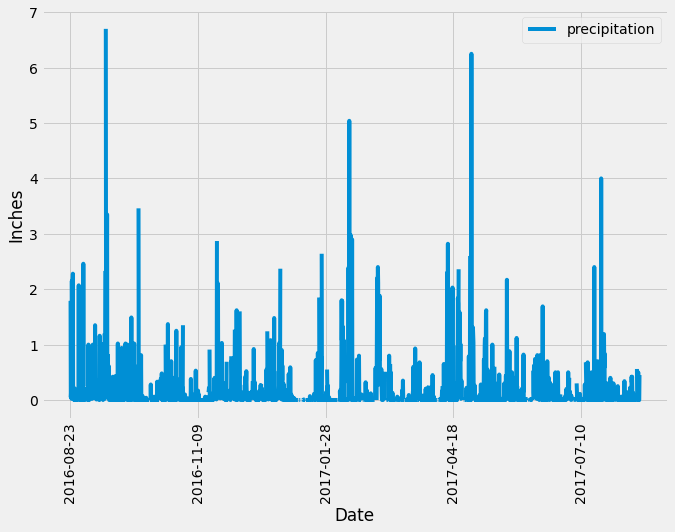

In [88]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precipitation', xlabel='Date', ylabel='Inches', rot=90, figsize=(10,7))
plt.legend(loc='upper right')
plt.show()
#NEED TO FIX
#x-axis ticks are not complete; need title

In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()